In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yaml

In [2]:
train_file_path = r"F:\iNeuron\Project\Bank-Credit-Risk-Prediction\banking\artifact\data_ingestion\2022-07-28-00-07-40\ingested_data\train\SouthGermanCredit.csv"

In [3]:
df = pd.read_csv(train_file_path)

In [4]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,4,12,4,9,1185,1,3,3,2,1,...,1,27,3,2,2,3,2,1,2,1
1,4,6,4,0,2080,3,3,1,4,1,...,3,24,3,2,1,3,2,1,2,1
2,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
3,1,15,4,2,1433,1,3,4,2,1,...,2,25,3,1,2,3,2,1,2,1
4,1,12,2,2,1657,1,3,2,3,1,...,1,27,3,2,1,3,2,1,2,1


In [5]:
df.shape

(800, 21)

In [6]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [41]:
file_path = r"F:\iNeuron\Project\Bank-Credit-Risk-Prediction\config\schema.yaml"

def read_yaml_file(file_path:str)->dict:
    with open(file_path, 'rb') as yaml_file:
        return yaml.safe_load(yaml_file)

In [42]:
numerical_columns = read_yaml_file(file_path)["numerical_columns"]
ordinal_columns = read_yaml_file(file_path)["ordinal_columns"]
categorical_columns = read_yaml_file(file_path)["categorical_columns"]

In [43]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,800.0,20.85875,11.976669,4.0,12.0,18.0,24.0,60.0
amount,800.0,3198.17625,2761.006535,250.0,1344.0,2281.5,3907.5,15945.0
age,800.0,35.65125,11.524133,19.0,27.0,33.0,42.0,75.0


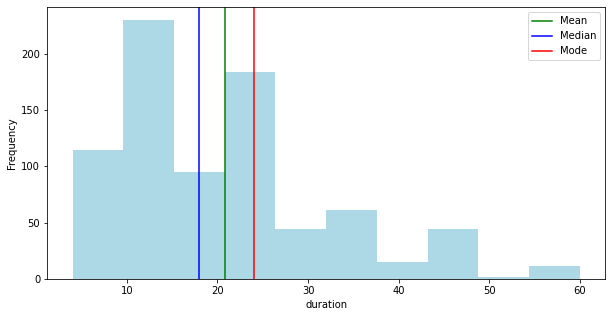

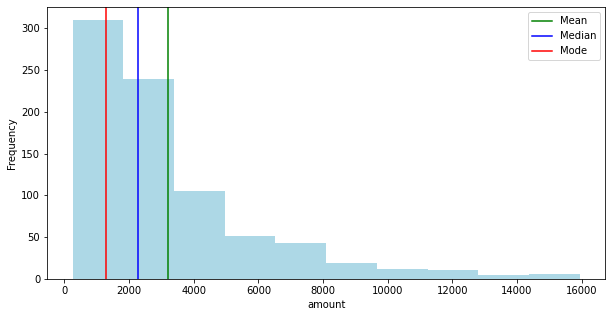

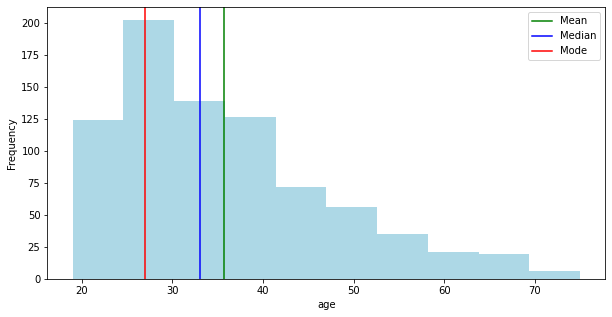

In [45]:
for column in df[numerical_columns]:
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()

    #print("{} Column statistics: Mean -> {}, Median -> {}, Mode -> {}".format(column, mean_val, median_val, mode_val))

    plt.figure(figsize=(10,5)) # set the figure size
    plt.hist(df[column],color='lightblue') #Plot the histogram
    #df[column].plot(kind = "kde", color='lightblue')
    
    plt.axvline(mean_val, color='green',label='Mean')     # Draw lines on the plot for mean median mode
    plt.axvline(median_val, color='blue',label='Median')
    plt.axvline(mode_val[0], color='red',label='Mode')

    plt.xlabel(column)   # label the x-axis
    plt.ylabel('Frequency')   # label the y-axis
    plt.legend()              # Plot the legend
    plt.show()

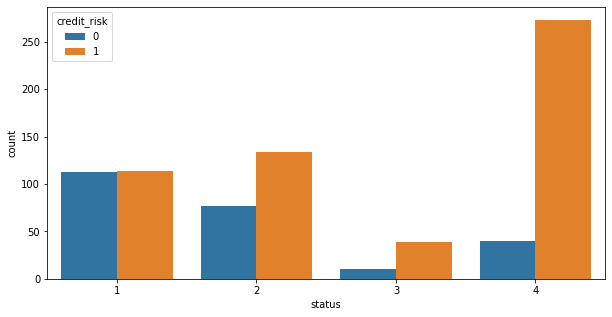

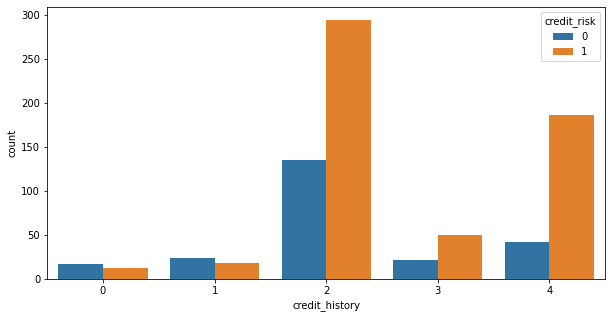

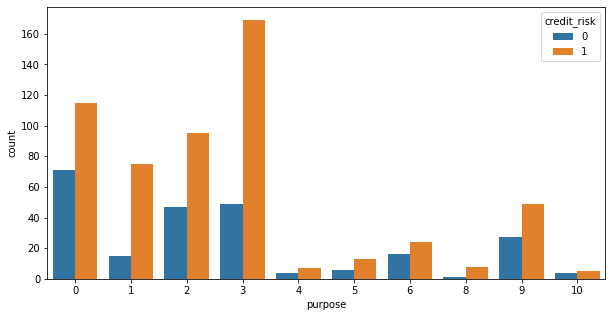

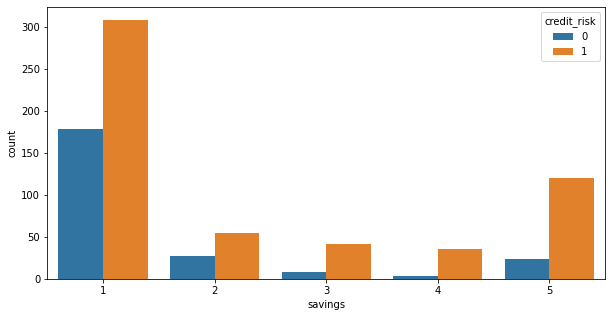

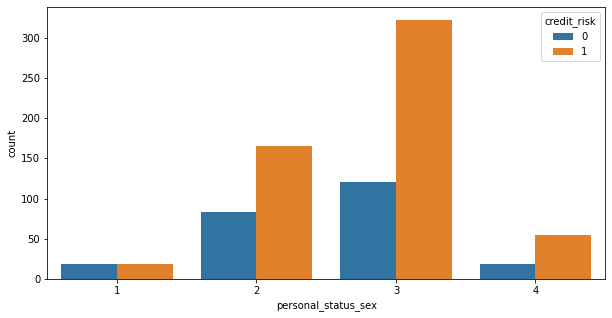

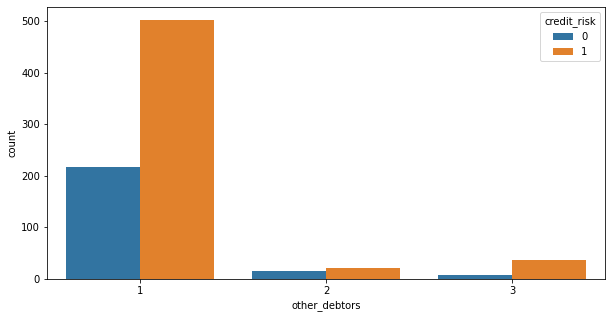

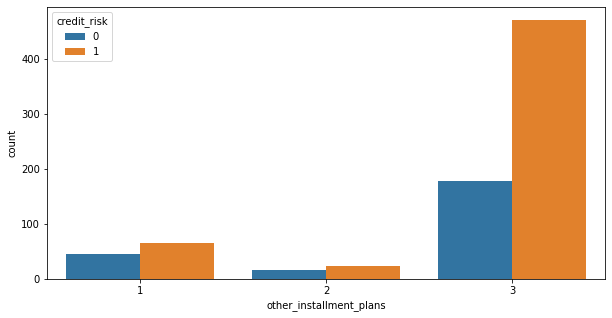

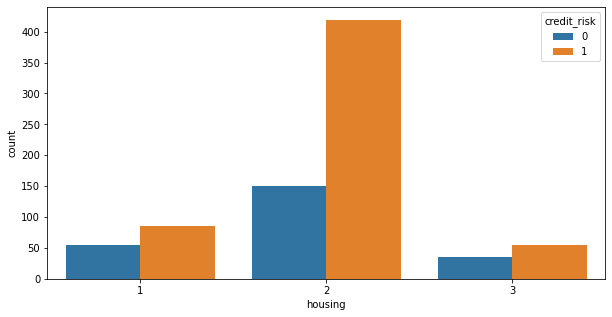

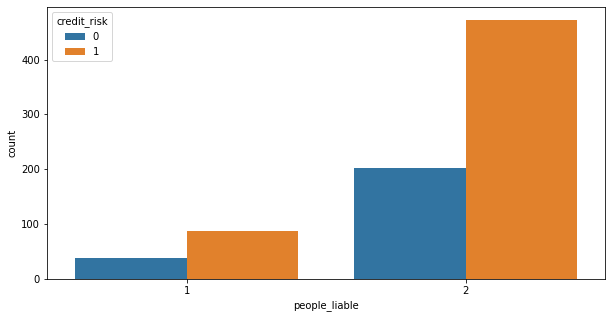

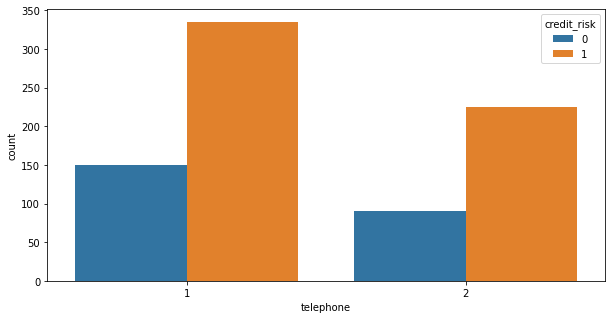

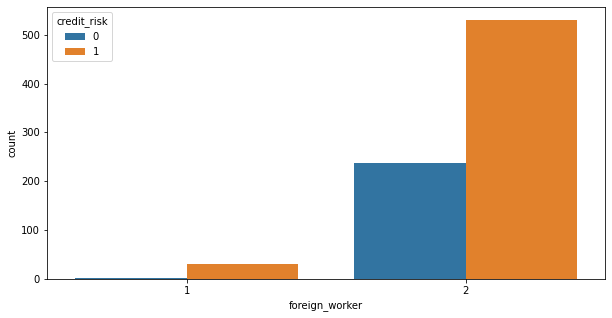

In [50]:
for column in df[categorical_columns]:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=column, hue='credit_risk')
    plt.show()

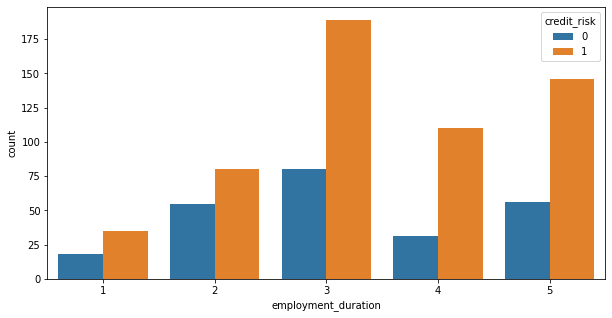

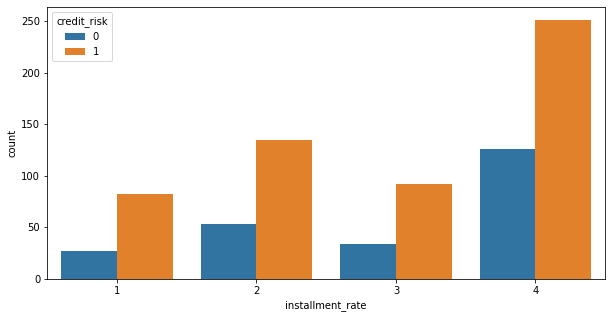

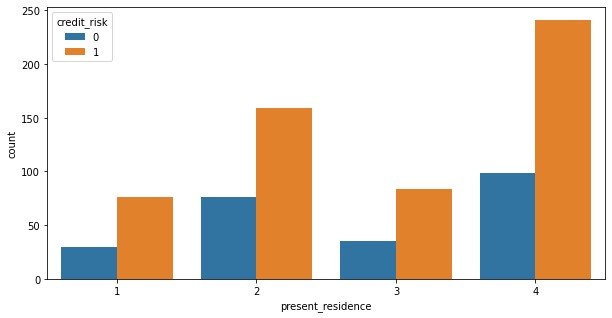

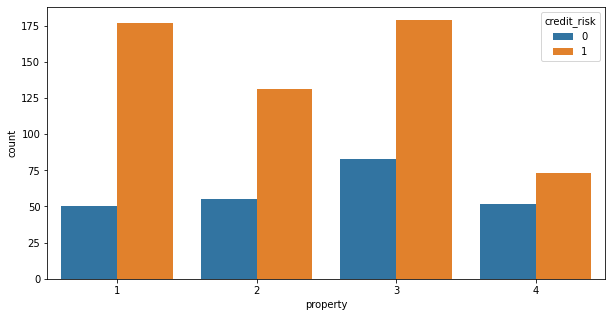

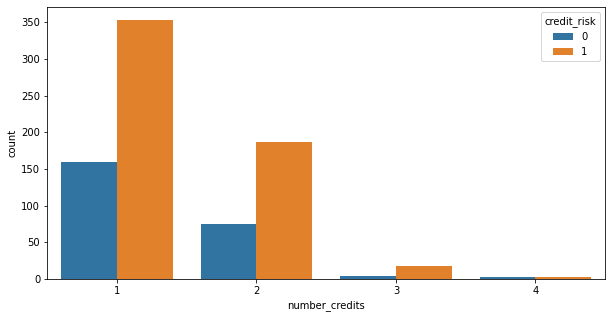

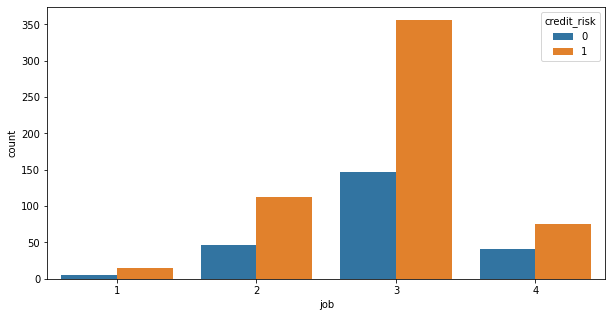

In [51]:
for column in df[ordinal_columns]:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=column, hue='credit_risk')
    plt.show()

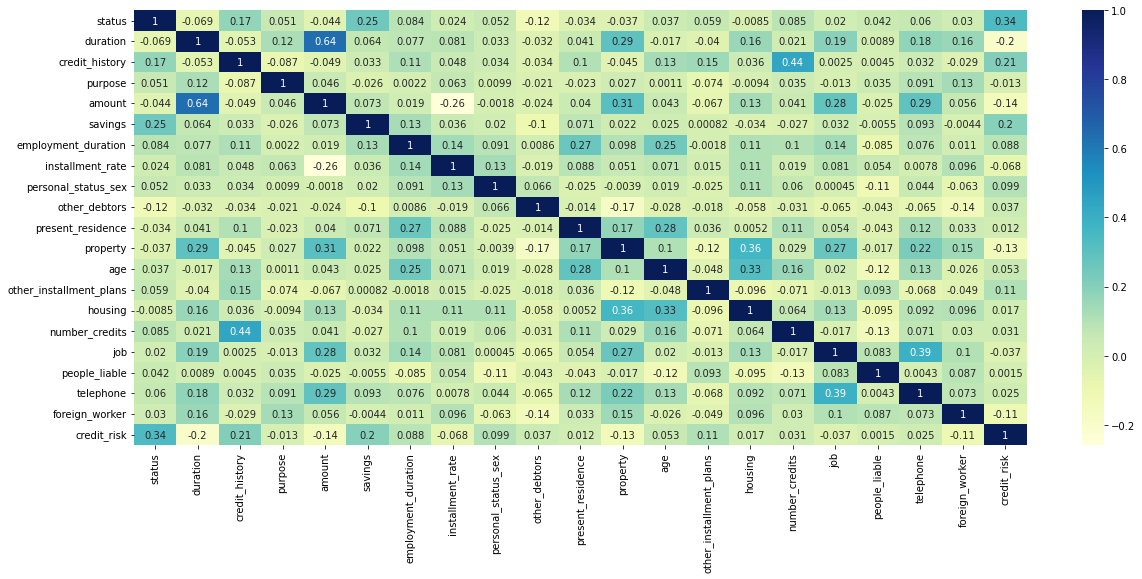

In [52]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [6]:
x,y = df.drop("credit_risk", axis=1), df['credit_risk']

In [7]:
print(x.shape)
print(y.shape)

(800, 20)
(800,)


In [8]:
x.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
simple_imputer =  SimpleImputer(strategy="median")

In [11]:
df_trans = simple_imputer.fit_transform(x)

In [12]:
simple_imputer.feature_names_in_

array(['status', 'duration', 'credit_history', 'purpose', 'amount',
       'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence',
       'property', 'age', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone',
       'foreign_worker'], dtype=object)

In [13]:
simple_imputer.statistics_

array([2.0000e+00, 1.8000e+01, 2.0000e+00, 2.0000e+00, 2.2815e+03,
       1.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
       3.0000e+00, 2.0000e+00, 3.3000e+01, 3.0000e+00, 2.0000e+00,
       1.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00])

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,800.0,2.56000,1.264278,1.0,1.0,2.0,4.0,4.0
duration,800.0,20.85875,11.976669,4.0,12.0,18.0,24.0,60.0
credit_history,800.0,2.53500,1.068973,0.0,2.0,2.0,4.0,4.0
purpose,800.0,2.81625,2.739867,0.0,1.0,2.0,3.0,10.0
amount,800.0,3198.17625,2761.006535,250.0,1344.0,2281.5,3907.5,15945.0
savings,800.0,2.09125,1.574332,1.0,1.0,1.0,3.0,5.0
employment_duration,800.0,3.38000,1.215503,1.0,3.0,3.0,5.0,5.0
installment_rate,800.0,2.96375,1.118705,1.0,2.0,3.0,4.0,4.0
personal_status_sex,800.0,2.68875,0.699990,1.0,2.0,3.0,3.0,4.0
other_debtors,800.0,1.15750,0.495480,1.0,1.0,1.0,1.0,3.0


In [15]:
#simple_imputer.transform()

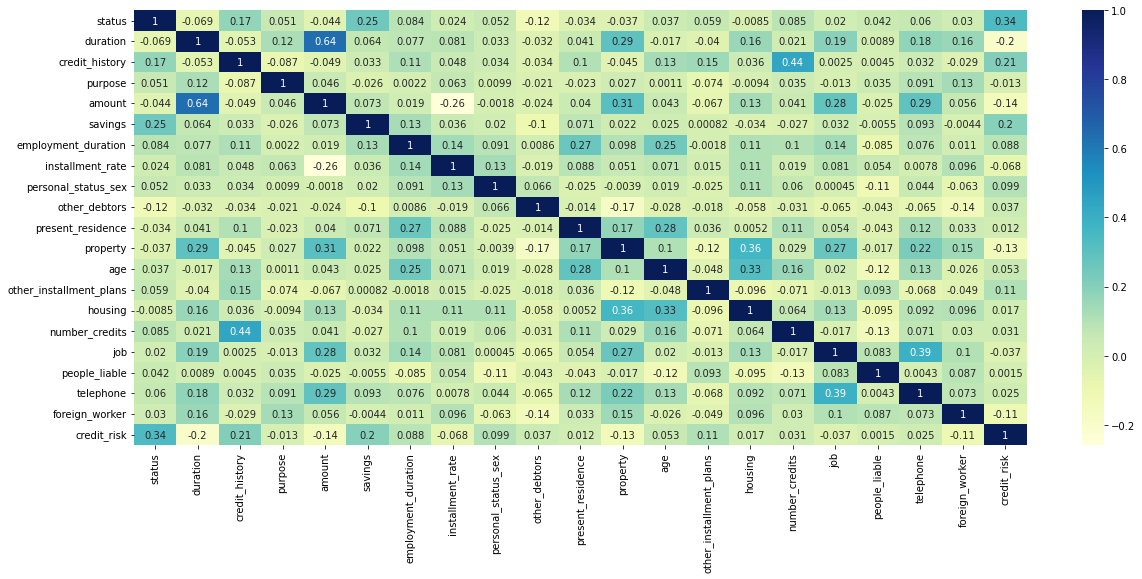

In [36]:
#corr = np.corrcoef(df.corr())
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
#    f, ax = plt.subplots(figsize=(20, 8))
#    ax = sns.heatmap(corr, mask=mask, annot=True, cmap="YlGnBu")